# Titanic 생존자 예측 프로젝트
### 1. 문제 정의 : 생존자 예측
### 2. 데이터 적재

# 목표설정
1. 문제 정의
2. 데이터 수집
3. 탐색적 데이터 분석 > 데이터 구조와 의미 파악
4. 특성 공학 > 필요 데이터 선택, 삭제, 가공단계
5. 머신러닝 > 학습 > 패턴(식) > 모델 생성
6. 성능평가

In [2]:
import numpy as np
import pandas as pd

In [3]:
from IPython.display import Image #이미지 넣는 기능 임포트

In [4]:
# 이미지 주소복사= https://steemitimages.com/DQmYZnMv9VctrzAqura5P6PuZTGKBDiQVpkwbAw2RMFAjV8/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%891.jpg
Image(url='https://steemitimages.com/DQmYZnMv9VctrzAqura5P6PuZTGKBDiQVpkwbAw2RMFAjV8/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%891.jpg')

In [5]:
# 데이터 적재
train = pd.read_csv('./data/train.csv') #train 데이터 읽어오기
test  = pd.read_csv('./data/test.csv') #test 데이터 읽어오기

### 3. 탐색적 데이터 분석(구조, 의미)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
# 타이타닉 데이터
1. Survived: 0(사망) / 1(생존) -> 범주형(Categorical Data) > 명목형(순서없음)
2. Pclass: ticket class 1 / 2 / 3 등급 -> 수치인데 순서에 의미가 없음, 문자로 바꿔도 상관 없는 데이터임 > 범주형으로 처리함
3. Sibsp: 형제자매, 배우자 명수 -> 수치형 > 이산형
4. Parch: 부모자식 탑승 명수 -> 수치형 > 이산형
5. Ticket: 티켓 번호(숫자) -> 순서형
6. Cabin: 배정된 방 번호(영문 + 숫자) -> 순서형
7. Embarked(선착장): C(Cherbourg) / Q(Queenstown) / S(Southmpton) -> 명목형(Categorical)

In [10]:
test.info() #타이타닉 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# 성별 생존여부에 따른 명수
survived = train[train['Survived']==1]['Sex'].value_counts()

In [11]:
dead = train[train['Survived']==0]['Sex'].value_counts()
dead

male      468
female     81
Name: Sex, dtype: int64

In [12]:
df = pd.DataFrame([survived, dead])
df

,female,male
Sex,233,109
Sex,81,468


In [13]:
df.index = ['Survived','Dead']
df

,female,male
Survived,233,109
Dead,81,468


<AxesSubplot:>

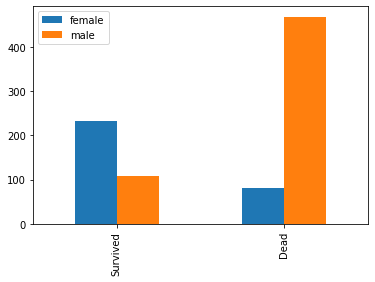

In [14]:
df.plot(kind='bar', stacked=False)

In [15]:
# 시각화 함수 선언
def bar_chart(col_name):
    survived = train[train['Survived']==1][col_name].value_counts()
    dead = train[train['Survived']==0][col_name].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index= ['Survived','Dead']
    df.plot(kind='bar', stacked=True)

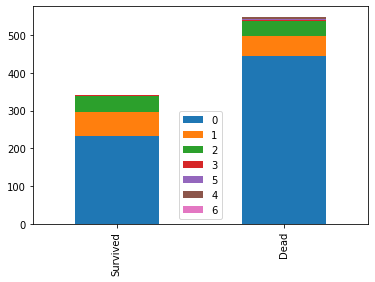

In [16]:
bar_chart('Parch')

# 데이터 전처리

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train.shape, test.shape

((891, 12), (418, 11))

In [23]:
train.isnull().sum() #널인 데이터 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
test.isnull().sum() #널인 데이터 확인

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
train['Name'] #필요 컬럼 구조 확인 (index, values 등 파악)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [27]:
train['Name'][0] #이름 구조 파악

'Braund, Mr. Owen Harris'

In [18]:
# Name => Mr, Miss, Mrs 추출
train_test_data = [train,test] # 데이터 전처리 동일

for dataset in train_test_data: # 2번 반복 
    dataset['Title'] = \
    dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [32]:
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

### 이름 => 명칭 추출 => 숫자 변경 (title mapping)
- Mr : 0
- Miss : 1
- Mrs : 2
- Others : 3

In [20]:
title_map = {
      'Mr':0
    , 'Miss':1
    , 'Mrs':2
    , 'Master': 3
    , 'Dr' : 3
    , 'Rev':3
    , 'Mlle':3
    , 'Major':3
    , 'Col':3
    , 'Countess':3
    , 'Capt':3
    , 'Ms':3
    , 'Sir':3
    , 'Lady':3
    , 'Mme':3
    , 'Don':3
    , 'Jonkheer':3
}

In [40]:
title_map

{'Mr': 0,
 'Miss': 1,
 'Mrs': 2,
 'Master': 3,
 'Dr': 3,
 'Rev': 3,
 'Mlle': 3,
 'Major': 3,
 'Col': 3,
 'Countess': 3,
 'Capt': 3,
 'Ms': 3,
 'Sir': 3,
 'Lady': 3,
 'Mme': 3,
 'Don': 3,
 'Jonkheer': 3}

In [21]:
train['Title'] = train['Title'].map(title_map)
train['Title'].head()

0    0
1    2
2    1
3    2
4    0
Name: Title, dtype: int64

In [22]:
test['Title'] = test['Title'].map(title_map)
test['Title'].head()

0    0.0
1    2.0
2    0.0
3    0.0
4    2.0
Name: Title, dtype: float64

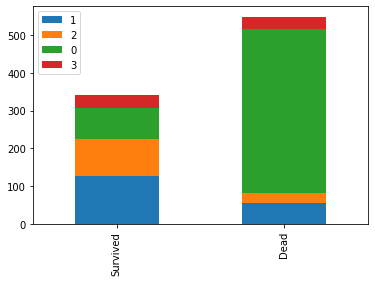

In [23]:
bar_chart('Title')

In [24]:
# Name 컬럼 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [25]:
# Sex => 'male' : 0, 'female' :1
sex_mapping = {'male' : 0, 'female' :1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [26]:
train['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [27]:
# 문자 => 숫자 : 인코딩
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


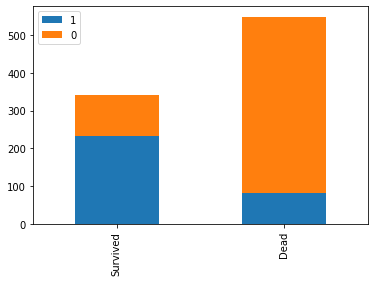

In [28]:
bar_chart('Sex')

In [29]:
# Age 전처리
# 2. 결측치 : 값이 없는 데이터 => 채우기 : fillna(value)
# - 가장 쉬운 방법은 결혼유무(title) 중앙값 채우기 
train['Age'].fillna(
      train.groupby('Title')['Age'].transform('median')
    , inplace=True
)
train['Age'].isnull().sum()

0

In [30]:
test['Age'].fillna(
      test.groupby('Title')['Age'].transform('median')
    , inplace=True
)
test['Age'].isnull().sum()

0

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [32]:
# 1. 연속(수치)데이터 => 범주형

In [33]:
test[test['Age'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [34]:
# 1. 연속(수치)데이터 => 범주형
#  분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

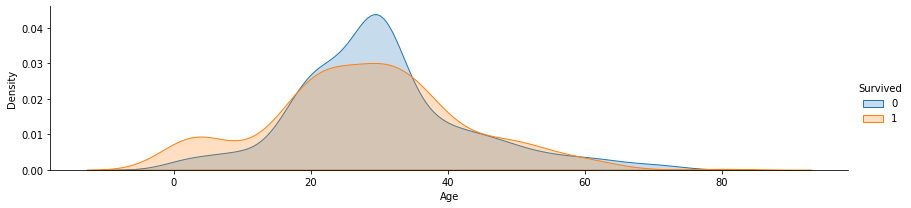

In [35]:
# facet : 면
# ojbect 생성
facet = sns.FacetGrid(
      train # dataframe
    , hue='Survived' # 조건(범례)
    , aspect=4
)
facet.map(
      sns.kdeplot # 밀도 <= 종류 지정
    , 'Age' # x축에 값 지정
    , shade=True
)
facet.add_legend()
plt.show()

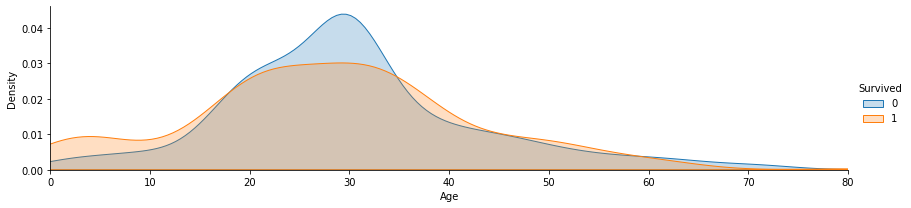

In [36]:
# facet : 면
# ojbect 생성
facet = sns.FacetGrid(
      train # dataframe
    , hue='Survived' # 조건(범례)
    , aspect=4
)
facet.map(
      sns.kdeplot # 밀도 <= 종류 지정
    , 'Age' # x축에 값 지정
    , shade=True
)
facet.set(xlim=(0, train['Age'].max())) # xlim=(시작값,끝값)
facet.add_legend()
plt.show()

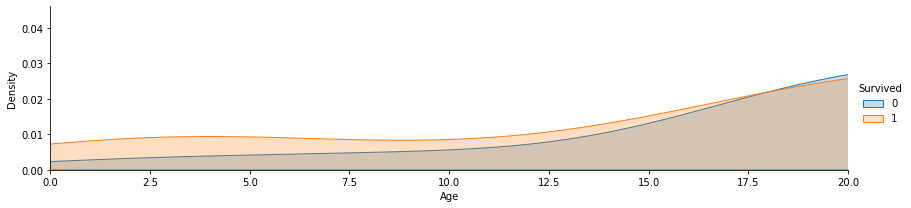

In [37]:
# facet : 면
# ojbect 생성
facet = sns.FacetGrid(
      train # dataframe
    , hue='Survived' # 조건(범례)
    , aspect=4
)
facet.map(
      sns.kdeplot # 밀도 <= 종류 지정
    , 'Age' # x축에 값 지정
    , shade=True
)
facet.set(xlim=(0, 20)) # xlim=(시작값,끝값)
facet.add_legend()
plt.show()

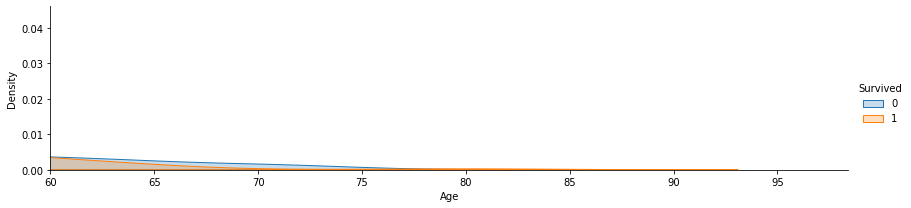

In [38]:
# facet : 면
# ojbect 생성
facet = sns.FacetGrid(
      train # dataframe
    , hue='Survived' # 조건(범례)
    , aspect=4
)
facet.map(
#     plt.scatter
      sns.kdeplot # 밀도 <= 종류 지정
    , 'Age' # x축에 값 지정
    , shade=True
)
# facet.set(xlim=(0, 20)) # xlim=(시작값,끝값)
facet.add_legend()
plt.xlim(60)
plt.show()

#### Binning
##### feature vector map
- child : 0 ~ 18 => 0
- young : 19 ~ 26 => 1
- adult : 27 ~ 36 => 2
- mid-age : 37 ~ 62 => 3
- senior : 63 ~ => 4

In [39]:
# train dataFrame 변형
train.loc[train['Age'] <=18, 'Age']= 0
train.loc[(train['Age'] > 18) & (train['Age'] <= 26), 'Age'] = 1
train.loc[(train['Age'] > 26) & (train['Age'] <= 36), 'Age'] = 2
train.loc[(train['Age'] > 36) & (train['Age'] <= 62), 'Age'] = 3
train.loc[train['Age'] > 62, 'Age'] = 4

In [40]:
train['Age'].value_counts()

2.0    336
1.0    216
3.0    180
0.0    144
4.0     15
Name: Age, dtype: int64

In [41]:
# test dataFrame 변형
test.loc[test['Age'] <=18, 'Age']= 0
test.loc[(test['Age'] > 18) & (test['Age'] <= 26), 'Age'] = 1
test.loc[(test['Age'] > 26) & (test['Age'] <= 36), 'Age'] = 2
test.loc[(test['Age'] > 36) & (test['Age'] <= 62), 'Age'] = 3
test.loc[test['Age'] > 62, 'Age'] = 4

In [42]:
test['Age'].value_counts()

2.0    139
1.0    114
3.0     99
0.0     59
4.0      7
Name: Age, dtype: int64

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


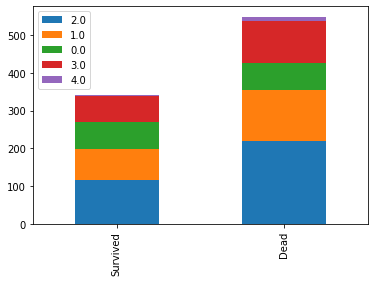

In [44]:
bar_chart('Age')

In [45]:
train['Embarked'].isnull().sum()

2

In [46]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

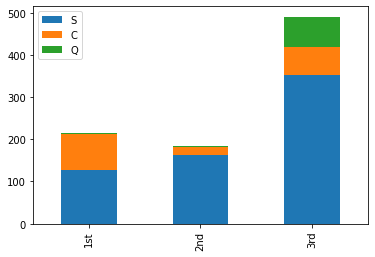

In [47]:
# Pclass 별 선착장 개수
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st','2nd','3rd']
df.plot(kind='bar', stacked=True)

In [48]:
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [49]:
train[train['Pclass']==2]['Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [50]:
train[train['Pclass']==3]['Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [46]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [53]:
train['Embarked'].isnull().sum()

0

In [54]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [55]:
embarked_mapping = {'S':0,'C':1,'Q':2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [57]:
# Fare 확인
train['Fare'].isnull().sum()

0

In [58]:
for df in train_test_data:
    df.loc[df['Fare'] <= 17, 'Fare'] = 0
    df.loc[(df['Fare'] > 17) & (df['Fare'] <=30), 'Fare'] = 1
    df.loc[(df['Fare'] > 30) & (df['Fare'] <=100), 'Fare'] = 2
    df.loc[df['Fare'] > 100, 'Fare'] = 3

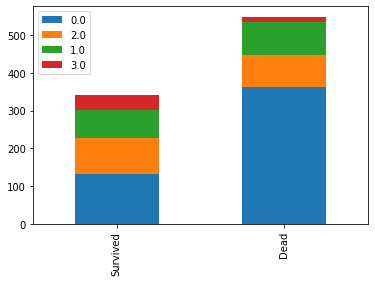

In [59]:
bar_chart('Fare')

In [60]:
# Cabin NaN Count
train['Cabin'].isnull().sum()

687

In [61]:
train['Cabin'].notnull().sum()

204

In [62]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [63]:
# 영문 추출
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [64]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [65]:
# Pclass별로 Cabin 분포
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()

In [66]:
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass2

F    8
D    4
E    4
Name: Cabin, dtype: int64

In [67]:
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
Pclass3

F    5
G    4
E    3
Name: Cabin, dtype: int64

In [68]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [69]:
cabin_mapping = {
    'A' : 0, 'B' : 0.4,'C' : 0.8,'D' : 1.2
    , 'E' : 1.6, 'F' : 2.0, 'G' : 2.4,'T' : 2.8
}
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [71]:
train['Cabin'].fillna(
    train.groupby('Pclass')['Cabin'].transform('median')
    , inplace=True
)
test['Cabin'].fillna(
    test.groupby('Pclass')['Cabin'].transform('median')
    , inplace=True
)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [73]:
# 가족수 = SibSp + Parch + 1
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

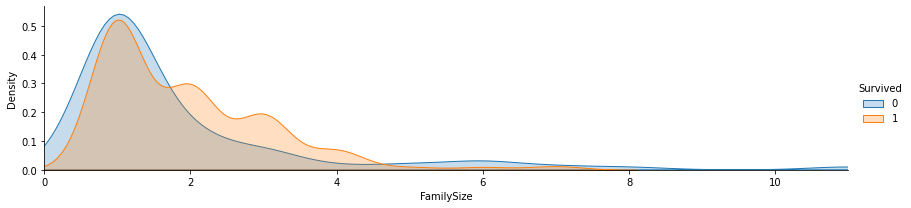

In [74]:
facet = sns.FacetGrid(
    train
    , hue='Survived'
    , aspect=4
)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.show()

In [75]:
family_mapping = {
     1:0, 2:0.4, 3:0.8,4:1.2,5:1.6,6:2.0
    ,7:2.4,8:2.8,9:3.2,10:3.6,11:4.0
}
train['FamilySize'] = train['FamilySize'].map(family_mapping)
test['FamilySize'] = test['FamilySize'].map(family_mapping)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [77]:
col_names = ['SibSp','Parch','Ticket']
train = train.drop(col_names, axis=1)
test = test.drop(col_names, axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [78]:
train = train.drop('PassengerId',axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [79]:
train_data = train.drop('Survived',axis=1, inplace=False)
train_data # 학습용 데이터

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1.0,1.0,0.4,0,1,0.0
888,3,1,1.0,1.0,2.0,0,1,1.2
889,1,0,1.0,1.0,0.8,1,0,0.0


In [80]:
target = train['Survived']
target # 원래 답 => 오차 => 오차 최소화(학습)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [81]:
train_data.shape, target.shape

((891, 8), (891,))

## Model create

In [82]:
# 지도학습
# KNN => Classifier : 분류
from sklearn.neighbors import KNeighborsClassifier 
# 의사결정나무 : DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트 => 앙상블 모델 => 배깅(투표)
from sklearn.ensemble import RandomForestClassifier
# SVC : Support Vector Classifier(분류)
from sklearn.svm import SVC

In [83]:
# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [84]:
k_fold = KFold(
      n_splits=10 # 10개로 나누어라
    , shuffle=True # 
    , random_state=0 # seed value = 0
)

In [85]:
# KNN 점수 출력
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy' # 정확도를 점수 산정의 기준 설정
score = cross_val_score(
      clf # 크로스 벨레데이션할 모델 지정
    , train_data # 학습데이터 지정
    , target # 원래답
    , cv=k_fold
    , n_jobs=-1 # 학습에 사용할 CPU 코어 수 지정
    , scoring=scoring
)
print(score)

[0.81111111 0.76404494 0.82022472 0.83146067 0.84269663 0.82022472
 0.83146067 0.78651685 0.83146067 0.80898876]


In [86]:
round(np.mean(score)*100, 2)

81.48

In [87]:
# Decision Tree 점수 출력
clf = DecisionTreeClassifier()
scoring = 'accuracy' # 정확도를 점수 산정의 기준 설정
score = cross_val_score(
      clf # 크로스 벨레데이션할 모델 지정
    , train_data # 학습데이터 지정
    , target # 원래답
    , cv=k_fold
    , n_jobs=-1 # 학습에 사용할 CPU 코어 수 지정
    , scoring=scoring
)
print(round(np.mean(score) * 100,2))

79.46


In [88]:
# RandomForest Classifier 점수 출력
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy' # 정확도를 점수 산정의 기준 설정
score = cross_val_score(
      clf # 크로스 벨레데이션할 모델 지정
    , train_data # 학습데이터 지정
    , target # 원래답
    , cv=k_fold
    , n_jobs=-1 # 학습에 사용할 CPU 코어 수 지정
    , scoring=scoring
)
print(round(np.mean(score) * 100,2))

80.7


In [89]:
# SVC 점수 출력
clf = SVC()
scoring = 'accuracy' # 정확도를 점수 산정의 기준 설정
score = cross_val_score(
      clf # 크로스 벨레데이션할 모델 지정
    , train_data # 학습데이터 지정
    , target # 원래답
    , cv=k_fold
    , n_jobs=-1 # 학습에 사용할 CPU 코어 수 지정
    , scoring=scoring
)
print(round(np.mean(score) * 100,2))

83.5


### Testing

In [90]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,0.0,2.0,0,2.0,0.4
2,894,2,0,3.0,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,0.0,2.0,0,2.0,0.8


In [91]:
test.loc[test['Fare'].isnull(), 'Fare'] = 3.0

In [92]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize


In [93]:
test.loc[test['Title'].isnull(), 'Title'] = 0.0

In [94]:
test[test['Title'].isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize


In [95]:
# Model create
clf = SVC()
# 학습 => Model create
clf.fit(train_data, target)

SVC()

In [96]:
# test date 추출
test_data = test.drop('PassengerId', axis=1).copy()
test_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0.0,0.0
1,3,1,3.0,0.0,2.0,0,2.0,0.4
2,2,0,3.0,0.0,2.0,2,0.0,0.0
3,3,0,2.0,0.0,2.0,0,0.0,0.0
4,3,1,1.0,0.0,2.0,0,2.0,0.8
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,2.0,0,0.0,0.0
414,1,1,3.0,3.0,0.8,1,0.0,0.0
415,3,0,3.0,0.0,2.0,0,0.0,0.0
416,3,0,2.0,0.0,2.0,0,0.0,0.0


In [97]:
# 예측값 출력
prediction = clf.predict(test_data)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [98]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Cabin       418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    float64
 7   FamilySize  418 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.2 KB


In [1]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId']
    ,'Survived' : prediction
})
submission.to_csv('submission.csv', index=False)

NameError: name 'pd' is not defined